# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!conda env list 

# conda environments:
#
base                  *  /Users/tess/opt/anaconda3
climate-change           /Users/tess/opt/anaconda3/envs/climate-change
climate_changes_env      /Users/tess/opt/anaconda3/envs/climate_changes_env
google                   /Users/tess/opt/anaconda3/envs/google
usc_ml                   /Users/tess/opt/anaconda3/envs/usc_ml



In [2]:
!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [3]:
print(cities)

['lebu', 'kahului', 'kapaa', 'rikitea', 'victoria', 'bethel', 'lata', 'avarua', 'tabou', 'punta arenas', 'ushuaia', 'quang ngai', 'port alfred', 'hermanus', 'bengkulu', 'hihifo', 'lagoa', 'chokurdakh', 'qaanaaq', 'voi', 'torbay', 'port augusta', 'ponta do sol', 'chuy', 'tiksi', 'airai', 'nikolskoye', 'mataura', 'puri', 'tuktoyaktuk', 'longyearbyen', 'merritt island', 'yarada', 'severnoye', 'busselton', 'imbituba', 'bandarbeyla', 'yellowknife', 'puerto ayora', 'cherskiy', 'emba', 'tapalpa', 'calvinia', 'upernavik', 'kodiak', 'geresk', 'dikson', 'dzhusaly', 'hobart', 'albany', 'havoysund', 'christchurch', 'taoudenni', 'kruisfontein', 'fethiye', 'esperance', 'nouadhibou', 'joutseno', 'mount gambier', 'magadan', 'guaruja', 'illoqqortoormiut', 'riyadh', 'brandon', 'salalah', 'kushima', 'pisco', 'fortuna', 'barrow', 'biak', 'kaitangata', 'mar del plata', 'grand river south east', 'marcona', 'jamestown', 'taolanaro', 'abha', 'constitucion', 'buin', 'darnah', 'dauphin', 'cape town', 'bredasdor

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
weather_results = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
#         time.sleep(10)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        resonse_json = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        lat = resonse_json["coord"]["lat"]
        lng = resonse_json["coord"]["lon"]
        max_temp = resonse_json["main"]["temp_max"]
        humidity = resonse_json["main"]["humidity"]
        clouds = resonse_json["clouds"]["all"]
        wind = resonse_json["wind"]["speed"]
        country = resonse_json["sys"]["country"]
        date = resonse_json["dt"]

        # Append the City information into city_data list
        weather_results.append({"City": city, 
                          "Lat": lat, 
                          "Lng": lng, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | kahului
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | lata
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | tabou
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | quang ngai
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | hihifo
City not found. Skipping...
Processing Record 17 of Set 1 | lagoa
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | voi
Processing Record 21 of Set 1 | torbay
Processing Record 22 of Set 1 | port augusta
Processing Record 23 of Set 1 | ponta 

In [8]:
weather_results

[{'City': 'lebu',
  'Lat': -37.6167,
  'Lng': -73.65,
  'Max Temp': 59.07,
  'Humidity': 78,
  'Cloudiness': 97,
  'Wind Speed': 2.98,
  'Country': 'CL',
  'Date': 1623435133},
 {'City': 'kahului',
  'Lat': 20.8947,
  'Lng': -156.47,
  'Max Temp': 81.34,
  'Humidity': 65,
  'Cloudiness': 1,
  'Wind Speed': 6.91,
  'Country': 'US',
  'Date': 1623435133},
 {'City': 'kapaa',
  'Lat': 22.0752,
  'Lng': -159.319,
  'Max Temp': 79.12,
  'Humidity': 69,
  'Cloudiness': 75,
  'Wind Speed': 4,
  'Country': 'US',
  'Date': 1623435134},
 {'City': 'rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 75.18,
  'Humidity': 84,
  'Cloudiness': 91,
  'Wind Speed': 16.6,
  'Country': 'PF',
  'Date': 1623435339},
 {'City': 'victoria',
  'Lat': 22.2855,
  'Lng': 114.1577,
  'Max Temp': 83.32,
  'Humidity': 91,
  'Cloudiness': 60,
  'Wind Speed': 10,
  'Country': 'HK',
  'Date': 1623435390},
 {'City': 'bethel',
  'Lat': 41.3712,
  'Lng': -73.414,
  'Max Temp': 79.81,
  'Humidity': 44,
  'Cloudin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Convert array of JSONs into Pandas DataFrame
weather_data = pd.DataFrame(weather_results)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,59.07,78,97,2.98,CL,1623435133
1,kahului,20.8947,-156.4700,81.34,65,1,6.91,US,1623435133
2,kapaa,22.0752,-159.3190,79.12,69,75,4.00,US,1623435134
3,rikitea,-23.1203,-134.9692,75.18,84,91,16.60,PF,1623435339
4,victoria,22.2855,114.1577,83.32,91,60,10.00,HK,1623435390
...,...,...,...,...,...,...,...,...,...
554,kaduqli,11.0167,29.7167,85.37,48,46,11.50,SD,1623435358
555,hargeysa,9.5600,44.0650,75.36,54,99,22.28,SO,1623435359
556,sandy bay,-42.9130,147.3532,57.06,94,90,4.00,AU,1623435311
557,kandara,25.7191,73.2765,94.46,38,0,17.83,IN,1623435359


In [10]:
# Show Record Count
weather_data.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [11]:
weather_data.to_csv('../output_data/weather_data.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,19.967159,18.443211,69.002576,67.711986,56.148479,7.528837,1.623435e+09
std,33.532254,89.879378,15.834302,21.951667,37.761957,5.566174,9.050666e+01
min,-54.800000,-179.166700,31.840000,2.000000,0.000000,0.000000,1.623435e+09
25%,-7.141700,-61.608150,58.125000,56.000000,18.500000,3.520000,1.623435e+09
50%,24.466700,24.662200,71.730000,72.000000,67.000000,5.990000,1.623435e+09
75%,47.391650,96.664250,79.780000,84.000000,91.500000,9.650000,1.623435e+09
max,78.218600,178.416700,112.440000,100.000000,100.000000,32.530000,1.623435e+09


In [13]:
#  Get the indices of cities that have humidity over 100%.
weather_city_data = weather_data[(weather_data["Humidity"] > 100)].index
                                  
weather_city_data

Int64Index([], dtype='int64')

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(weather_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,59.07,78,97,2.98,CL,1623435133
1,kahului,20.8947,-156.4700,81.34,65,1,6.91,US,1623435133
2,kapaa,22.0752,-159.3190,79.12,69,75,4.00,US,1623435134
3,rikitea,-23.1203,-134.9692,75.18,84,91,16.60,PF,1623435339
4,victoria,22.2855,114.1577,83.32,91,60,10.00,HK,1623435390


In [15]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv('../output_data/City_Data.csv', index_label="City_ID")

In [16]:
weather_city_data

Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

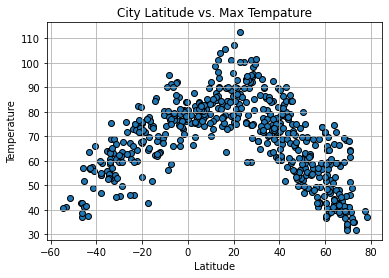

In [23]:
# Create a Scatter Plot for Latitude vs. Temperature
plt.scatter(lats,max_temps, edgecolor="black", marker='o')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('City Latitude vs. Max Tempature')
plt.grid(True)

plt.savefig("../output_data/lat_temp.png")
plt.show()

## Latitude vs. Humidity Plot

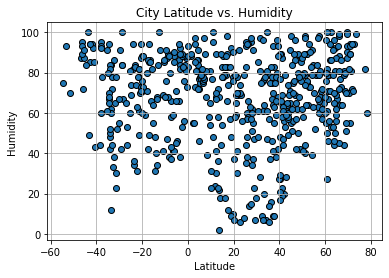

In [24]:
# Create a Scatter Plot for Latitude vs. Temperature
plt.scatter(lats, humidity, edgecolor="black", marker='o')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')
plt.grid(True)

plt.savefig("../output_data/lat_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

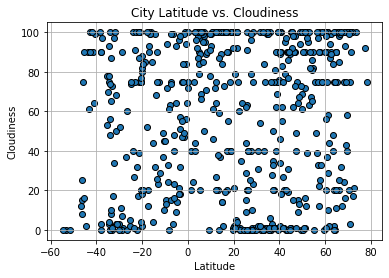

In [27]:
# Create a Scatter Plot for Latitude vs. Temperature
plt.scatter(lats, cloudiness, edgecolor="black", marker='o')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
plt.grid(True)

plt.savefig("../output_data/lat_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

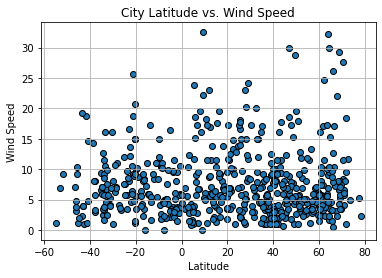

In [26]:
# Create a Scatter Plot for Latitude vs. Temperature
plt.scatter(lats, wind_speed, edgecolor="black", marker='o')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')
plt.grid(True)

plt.savefig("../output_data/lat_wind_speed.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


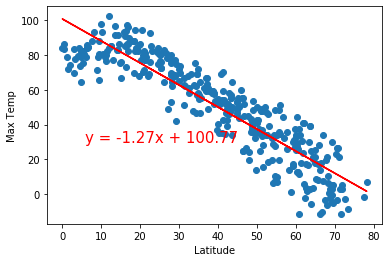

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


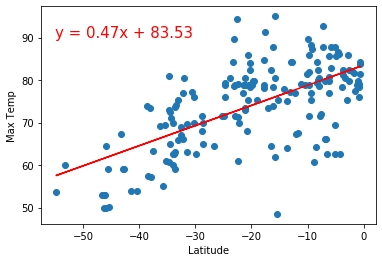

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


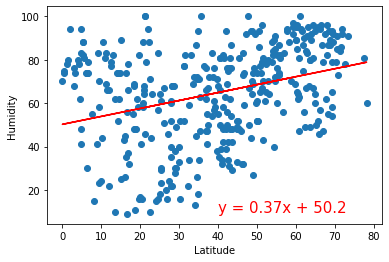

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


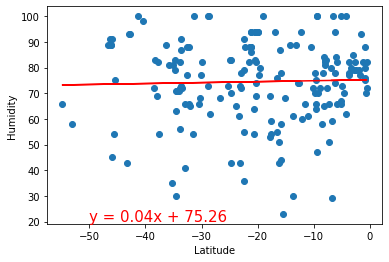

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


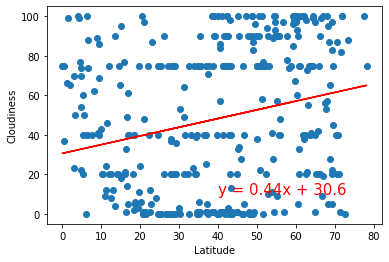

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


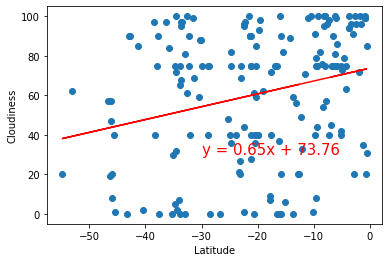

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


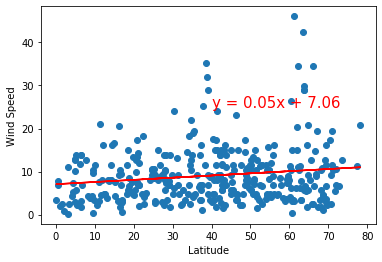

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


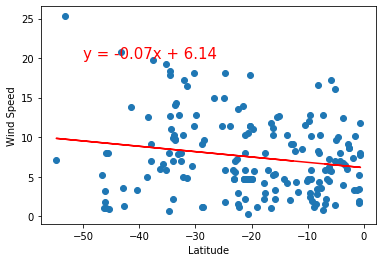